

#Classify hand-written number (Hand Written Digit Recognition)


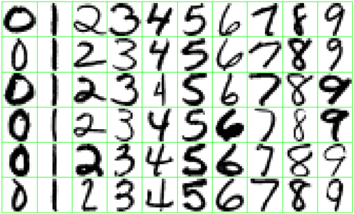

These digitalized images were obtained by scanning hand-written zip code numbers from enveloped processed by the US Postal Service. These are gray-scale images with a 16 x 16 resolution. Each pixel’s intensity goes from -1 to 1 (White to black). Images have been processed so they have approximately the same size and orientation.



This is naturally a classification problem and it is very important to keep the error rate very low to avoid mail misdirection. Column one contains the variable to classify coded in the following manner: 0=‘cero’; 1=‘uno’; 2=‘dos’; 3=‘tres’; 4=‘cuatro’; 5=‘cinco’;6=‘seis’; 7=‘siete’; 8=‘ocho’ y 9=‘nueve’ (0=‘zero’; 1=‘one’; 2=‘two; 3=‘three’; 4=‘four’; 5=‘five’;6=‘six’; 7=‘seven’; 8=‘eight’ y 9=‘nine’). The other columns are the predictive attributes. Each row of attributes represents a 16x16 image, thus each row has 256 predictive variables.

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Get performance measures
from sklearn.metrics import classification_report

c:\Users\ywong\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ZipData = 'C:\\test\\ZipData_2020.csv'
# Read the URL to load datasets
zipData = pd.read_csv(ZipData, sep= ';')

In [3]:
zipData.head(10)

,Numero,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
0,seis,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,cinco,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,cuatro,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,siete,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,tres,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,seis,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,tres,-1.0,-1.0,-1.0,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,uno,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,cero,-1.0,-1.0,-1.0,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,uno,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [4]:
#Encode Categporical variable
le = LabelEncoder()
zipData['Numero_enc'] = le.fit_transform(zipData['Numero'])
y = zipData['Numero_enc']

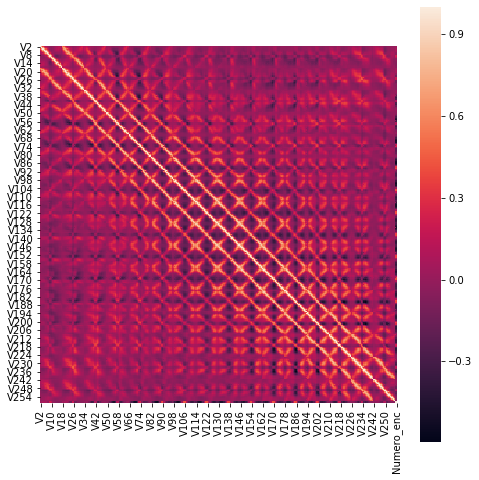

In [6]:
# Correlation Matrix for all variables
corrmat = zipData.corr()
f, ax = plt.subplots(figsize=(8, 8))
sn.heatmap(corrmat, vmax=1, square=True);


In [7]:
X = zipData.drop(columns = ["Numero",'Numero_enc'], axis = 1)

In [8]:
# Separate train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=0)

# Standarize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fit classifier with train data
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# Predict test data
y_pred=NB.predict(X_test)
print(y_pred)
print(y_test)

[9 4 3 ... 3 8 7]
2615    9
296     4
7311    3
2343    3
5564    5
       ..
1357    9
3439    4
1284    3
3197    8
1515    7
Name: Numero_enc, Length: 1860, dtype: int32


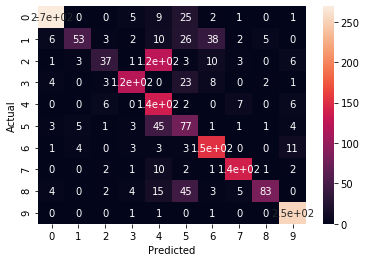

In [11]:
# Task 4: Generate a confusion table
# Pretty print confusion matrix
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

In [12]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[269   0   0   5   9  25   2   1   0   1]
 [  6  53   3   2  10  26  38   2   5   0]
 [  1   3  37   1 124   3  10   3   0   6]
 [  4   0   3 121   0  23   8   0   2   1]
 [  0   0   6   0 137   2   0   7   0   6]
 [  3   5   1   3  45  77   1   1   1   4]
 [  1   4   0   3   3   3 153   0   0  11]
 [  0   0   2   1  10   2   1 139   1   2]
 [  4   0   2   4  15  45   3   5  83   0]
 [  0   0   0   1   1   0   1   0   0 254]]


In [15]:
# Task 4: Calculate accuracy 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       312
           1       0.82      0.37      0.50       145
           2       0.69      0.20      0.31       188
           3       0.86      0.75      0.80       162
           4       0.39      0.87      0.54       158
           5       0.37      0.55      0.44       141
           6       0.71      0.86      0.77       178
           7       0.88      0.88      0.88       158
           8       0.90      0.52      0.66       161
           9       0.89      0.99      0.94       257

    accuracy                           0.71      1860
   macro avg       0.74      0.68      0.67      1860
weighted avg       0.77      0.71      0.70      1860



In [ ]:
# Accuracy: 0.71